In [1]:
import data_loaders
import mnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch

train_loader, valid_loader, test_loader = mnist.get_data()

# data_loaders.preview_data_sample(train_loader.dataset)
image, label = train_loader.dataset[0]
# image.shape
# t = Image.open(r'C:\Users\Danny\ml_datasets\mnist\train\4\02542.png')
t = Image.open(r"C:\Users\Danny\OneDrive\2 Areas\IP RxVeriSure\rxverisure\logo\Main Logo Check.png")
torch.tensor(np.array(t)).shape

# plt.imshow

torch.Size([32, 32, 4])

In [11]:
from importlib import reload # import the reload function
reload(data_loaders) 

<module 'data_loaders' from 'F:\\Coding\\data-science\\fastai\\neural-net-experiments\\data_loaders.py'>

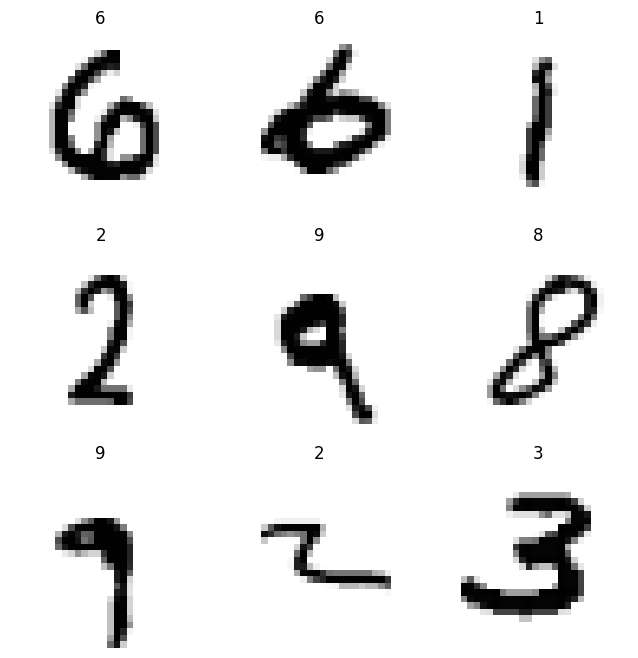

In [12]:
data_loaders.preview_data_sample(train_loader.dataset)

In [16]:
from torchvision.models import resnet18
import learning

In [14]:
torch.cuda.is_available()

True

In [19]:
from torch import nn

torch.cuda.empty_cache()
model = resnet18(weights=None, num_classes=10).to("cuda")
learner = learning.Learner(
    data_loaders=learning.DataLoaders(train_loader, valid_loader, test_loader),
    model=model,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=torch.optim.SGD(model.parameters(), lr=0.1),
    device="cuda"
)

learner.train_model(5)

Output()

KeyboardInterrupt: 

In [2]:
from torchvision.io import ImageReadMode, read_image
from torchvision.models import resnet18

test_4_gray = read_image(r'C:\Users\Danny\ml_datasets\mnist\train\4\02542.png')
test_4_rgb = read_image(r'C:\Users\Danny\ml_datasets\mnist\train\4\02542.png', ImageReadMode.RGB)
test_4_gray.shape, test_4_rgb.shape

(torch.Size([1, 28, 28]), torch.Size([3, 28, 28]))

In [32]:
image.shape, image.squeeze().shape

(torch.Size([3, 28, 28]), torch.Size([3, 28, 28]))

In [34]:
test_4_gray.shape, test_4_gray.squeeze().shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

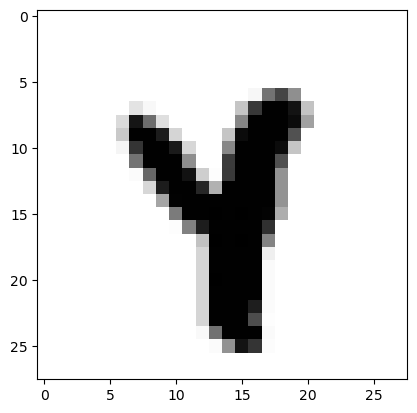

In [36]:
plt.imshow(test_4_gray.permute(1, 2, 0), cmap='gray')

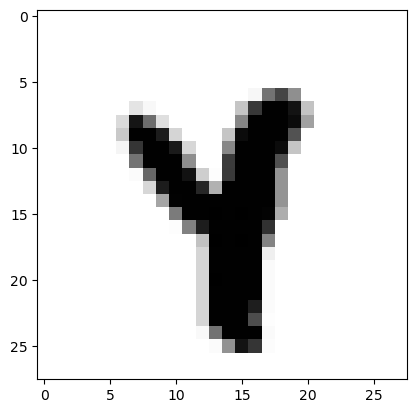

In [38]:
plt.imshow(test_4_rgb.permute(1, 2, 0))

In [66]:
# model = torch.hub.load("pytorch/vision:v0.10.0", "resnet18", pretrained=False)
model = resnet18(num_classes=10, pretrained=False)
model.eval()
logits = model(test_4_rgb.float().unsqueeze(0))
logits
# test_4_rgb.float().byte()

c:\Users\Danny\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\Danny\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


tensor([[-19.4321,  64.5792,  56.0204,  81.3640,  28.0195,  -5.9913,   2.5978,
         -22.1390, -76.7295, -41.8651]], grad_fn=<AddmmBackward0>)